# <font style = "color:rgb(50,120,229)"> Coin Detection </font>

So far we have studied about various mophological operations and different thresholding techniques in some detail. Now it's time to apply these concepts for a practical application - **Coin Detection**.

## <font style = "color:rgb(50,120,229)"> Aim </font>

In this assignment, you will work with 2 different images (so 2 different parts) and will use **only** morphological operations and thresholding techniques to detect the total number of coins present in the image. Your submission will be graded based on your use of the concepts covered in this module, experimentation performed to achieve at your final solution, documentation, and finally, the total number of coins successfully detected in the images. Each part will be of 15 marks. This assignment will be entirely **manually graded** so make sure that you do NOT remove any experimentation you have done as well as the observation you made after each step.

**Proper documentation for each step should be provided with help of markdown**

## <font style = "color:rgb(50,120,229)">Outline</font>

The main steps that you can follow to solve this assignment are:

1. Read the image.
2. Convert it to grayscale and split the image into the 3 (Red, Green and Blue) channels. Decide which of the above 4 images you want to use in further steps and provide reason for the same.
3. Use thresholding and/or morphological operations to arrive at a final binary image.
4. Use **simple blob detector** to count the number of coins present in the image.
5. Use **contour detection** to count the number of coins present in the image.
6. Use **CCA** to count the number of coins present in the image.

**We have also provided the results we obtained at the intermediate steps for your reference.**

# <font style = "color:rgb(50,120,229)">Assignment Part - A</font>

## <font style = "color:rgb(50,120,229)"> Step 1: Read Image</font>

In [1]:
import cv2
import matplotlib.pyplot as plt
from dataPath import DATA_PATH
import numpy as np
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'

Text(0.5,1,'Original Image')

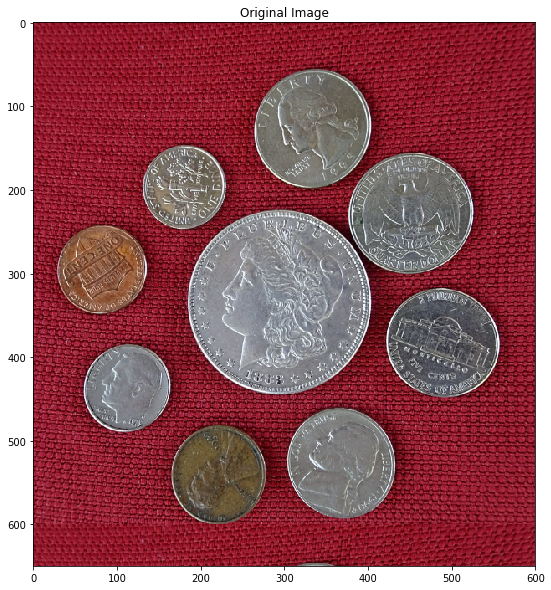

In [3]:
# Image path
imagePath = DATA_PATH + "images/CoinsA.png"
# Read image
# Store it in the variable image
###
### YOUR CODE HERE
###
image = cv2.imread(imagePath, 1)
imageCopy = image.copy()
plt.imshow(image[:,:,::-1]);
plt.title("Original Image")

## <font style = "color:rgb(50,120,229)">Step 2.1: Convert Image to Grayscale</font>

In [4]:
# Convert image to grayscale
# Store it in the variable imageGray
###
### YOUR CODE HERE
###
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

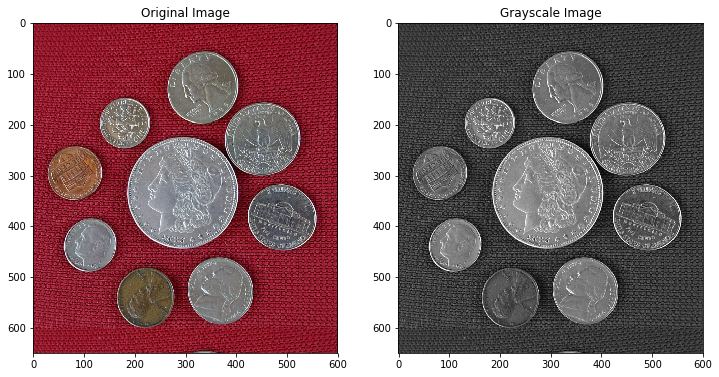

In [5]:
plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(image[:,:,::-1]);
plt.title("Original Image")
plt.subplot(122)
plt.imshow(imageGray);
plt.title("Grayscale Image");

## <font style = "color:rgb(50,120,229)">Step 2.2: Split Image into R,G,B Channels</font>

In [6]:
# Split cell into channels
# Store them in variables imageB, imageG, imageR
###
### YOUR CODE HERE
###
imageB, imageG, imageR = cv2.split(image)

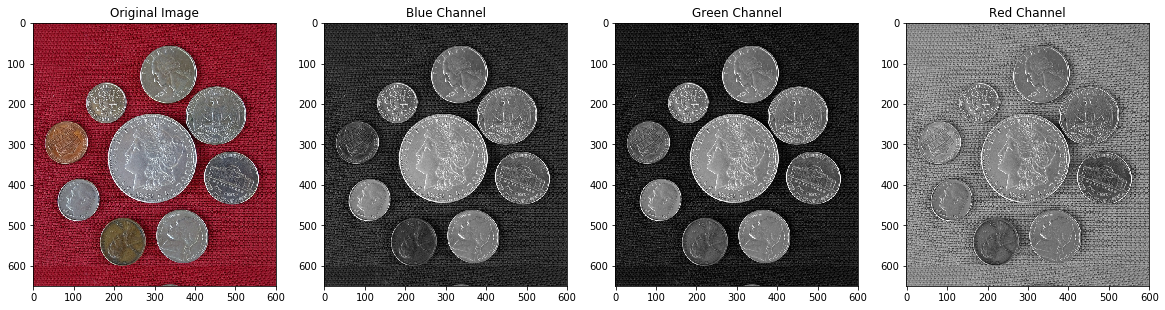

In [7]:
plt.figure(figsize=(20,12))
plt.subplot(141)
plt.imshow(image[:,:,::-1]);
plt.title("Original Image")
plt.subplot(142)
plt.imshow(imageB);
plt.title("Blue Channel")
plt.subplot(143)
plt.imshow(imageG);
plt.title("Green Channel")
plt.subplot(144)
plt.imshow(imageR);
plt.title("Red Channel");

## <font style = "color:rgb(50,120,229)">Step 3.1: Perform Thresholding</font>

You will have to carry out this step with different threshold values to see which one suits you the most. Do not remove those intermediate images and make sure to document your findings.

In [8]:
###
### YOUR CODE HERE
###
_, imBinary127 = cv2.threshold(imageG, 127, 255, cv2.THRESH_BINARY)
_, imBinaryInv127 = cv2.threshold(imageG, 127, 255, cv2.THRESH_BINARY_INV)
_, imBinary30 = cv2.threshold(imageG, 30, 255, cv2.THRESH_BINARY)
_, imBinaryInv30 = cv2.threshold(imageG, 30, 255, cv2.THRESH_BINARY_INV)


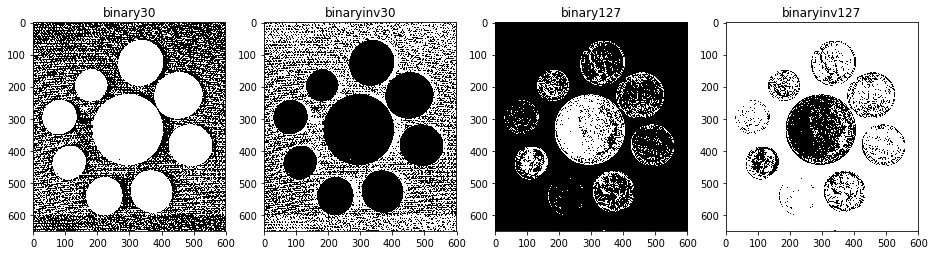

In [9]:
# Display the thresholded image
###
### YOUR CODE HERE
###
plt.figure(figsize=(20,12))
plt.subplot(151)
plt.imshow(imBinary30);
plt.title("binary30")
plt.subplot(152)
plt.imshow(imBinaryInv30);
plt.title("binaryinv30");
plt.subplot(153)
plt.imshow(imBinary127);
plt.title("binary127");
plt.subplot(154)
plt.imshow(imBinaryInv127);
plt.title("binaryinv127");

## <font style = "color:rgb(50,120,229)">Step 3.2: Perform morphological operations</font>

You will have to carry out this step with different kernel size, kernel shape and morphological operations to see which one (or more) suits you the most. Do not remove those intermediate images and make sure to document your findings.

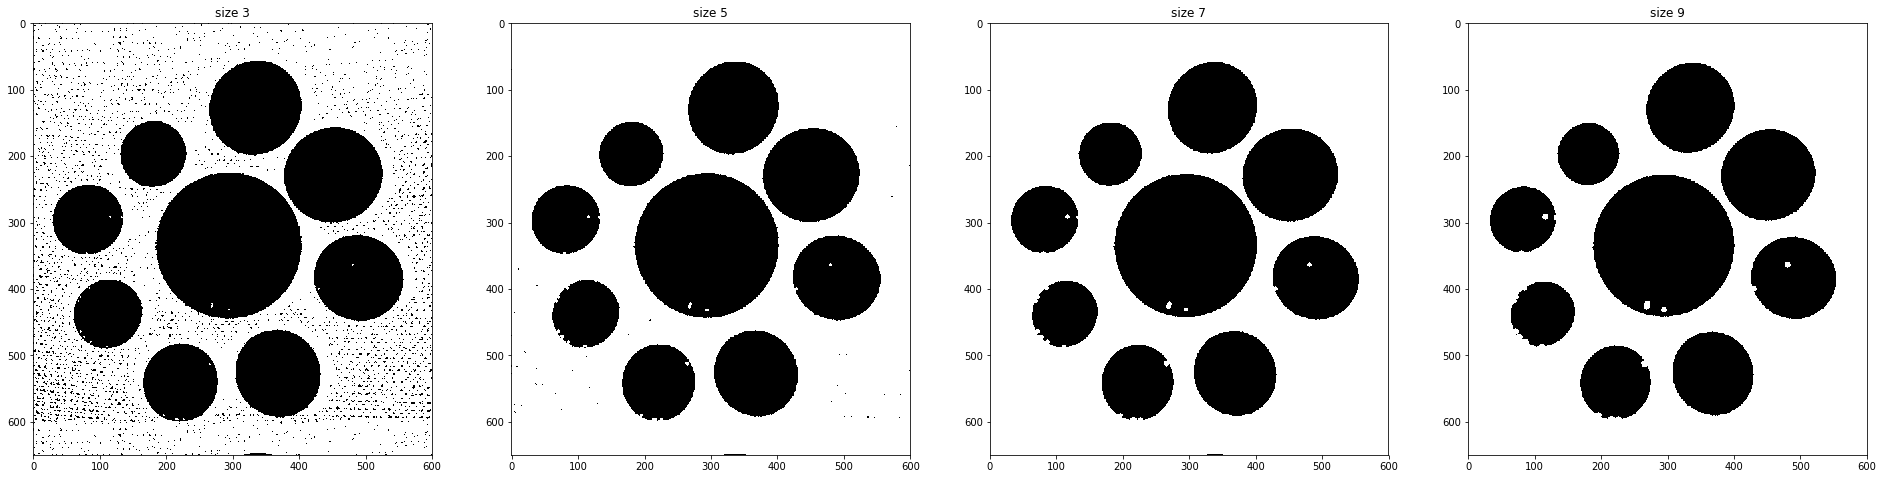

In [10]:
###
### YOUR CODE HERE
###
imThreshold = imBinaryInv30.copy()

dilations = []

for i in [3, 5, 7, 9]:    
    ksize = i
    element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (i,i))
    dilation = cv2.dilate(imThreshold, element)
    dilations.append(dilation)

plt.figure(figsize=(50,50))
plt.subplot(161)
plt.imshow(dilations[0]);
plt.title("size 3")
plt.subplot(162)
plt.imshow(dilations[1]);
plt.title("size 5")
plt.subplot(163)
plt.imshow(dilations[2]);
plt.title("size 7")
plt.subplot(164)
plt.imshow(dilations[3]);
plt.title("size 9");

Text(0.5,1,'imDilated')

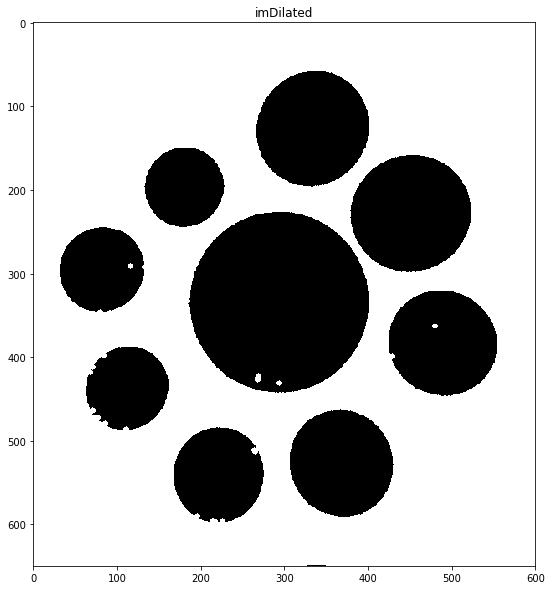

In [11]:
###
### YOUR CODE HERE
###
imDilated = dilations[2]
plt.imshow(imDilated);
plt.title("imDilated")

In [12]:
# Display all the images
# you have obtained in the intermediate steps
###
### YOUR CODE HERE
###


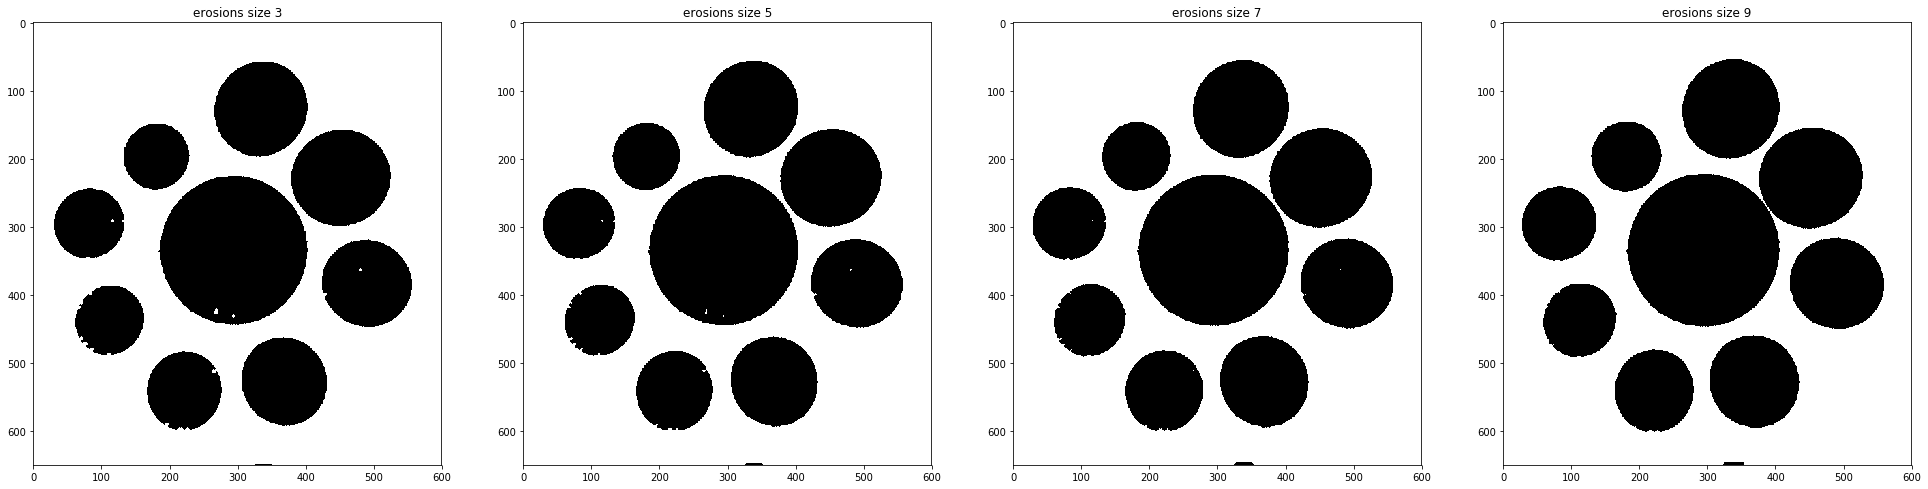

In [13]:
# Get structuring element/kernel which will be used for dilation
###
### YOUR CODE HERE
###
erosions = []

for i in [3, 5, 7, 9]:
    ksize = i
    element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (i,i))
    erosion = cv2.erode(imDilated, element)
    erosions.append(erosion)

plt.figure(figsize=(60, 60))
plt.subplot(171)
plt.imshow(erosions[0]);
plt.title("erosions size 3")
plt.subplot(172)
plt.imshow(erosions[1]);
plt.title("erosions size 5")
plt.subplot(173)
plt.imshow(erosions[2]);
plt.title("erosions size 7")
plt.subplot(174)
plt.imshow(erosions[3]);
plt.title("erosions size 9");


Text(0.5,1,'imEroded')

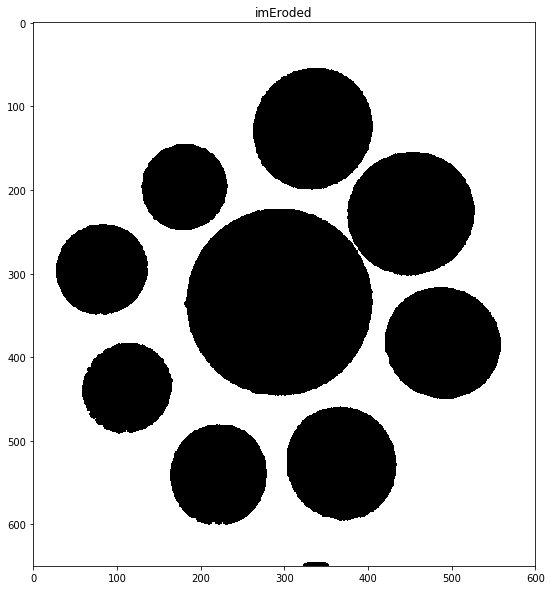

In [14]:
###
### YOUR CODE HERE
###
imEroded = erosions[3]
plt.imshow(imEroded);
plt.title("imEroded")

In [15]:
###
### YOUR CODE HERE
###


## <font style = "color:rgb(50,120,229)">Step 4.1: Create SimpleBlobDetector</font>

In [16]:
# Set up the SimpleBlobdetector with default parameters.
params = cv2.SimpleBlobDetector_Params()

params.blobColor = 0

params.minDistBetweenBlobs = 2

# Filter by Area.
params.filterByArea = False

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.8

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.8

# Filter by Inertia
params.filterByInertia =True
params.minInertiaRatio = 0.8

In [17]:
# Create SimpleBlobDetector
detector = cv2.SimpleBlobDetector_create(params)

## <font style = "color:rgb(50,120,229)">Step 4.2: Detect Coins</font>

### <font style = "color:rgb(8,133,37)">Hints</font>
Use **`detector.detect(image)`** to detect the blobs (coins). The output of the function is a list of **keypoints** where each keypoint is unique for each blob.

Print the number of coins detected as well.

In [18]:
# Detect blobs
###
### YOUR CODE HERE
###
keypoints = detector.detect(imEroded)


In [19]:
# Print number of coins detected
###
### YOUR CODE HERE
###
print("Number of coins detected = ", len(keypoints))

Number of coins detected =  9


**Note that we were able to detect all 9 coins. So, that's your benchmark.**

## <font style = "color:rgb(50,120,229)">Step 4.3: Display the detected coins on original image</font>

Make sure to mark the center of the blobs as well. **Use only the functions discussed in Image Annotation section in Week 1**

### <font style = "color:rgb(8,133,37)">Hints</font>
You can extract the coordinates of the center and the diameter of a blob using **`k.pt`** and **`k.size`** where `k` is a keypoint.

Text(0.5,1,'SimpleBlobDetector detect')

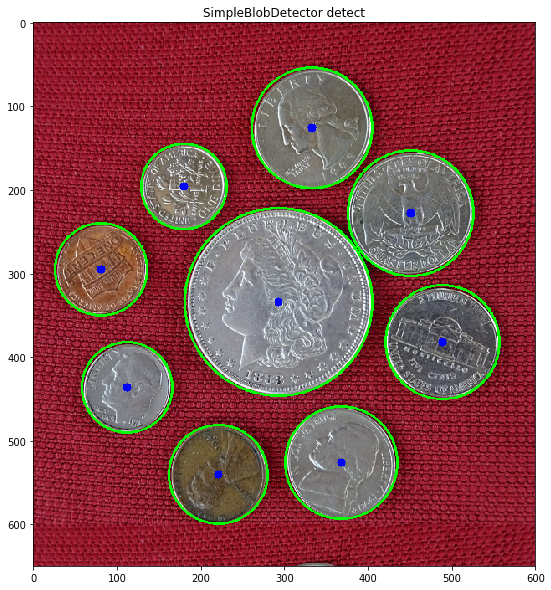

In [20]:
# Mark coins using image annotation concepts we have studied so far
###
### YOUR CODE HERE
###
for point in keypoints:
    x, y = point.pt
    x=int(x)
    y=int(y)
    cv2.circle(image, (x,y), 5, (255, 0, 0), -1)
    radius = int(point.size // 2)
    cv2.circle(image, (x,y), radius, (0, 255, 0), 2)
    
plt.figure()
plt.imshow(image[:,:,::-1])
plt.title("SimpleBlobDetector detect")

In [21]:
# Display the final image
###
### YOUR CODE HERE
###


## <font style = "color:rgb(50,120,229)">Step 4.4: Perform Connected Component Analysis</font>

In the final step, perform Connected Component Analysis (CCA) on the binary image to find out the number of connected components. Do you think we can use CCA to calculate number of coins? Why/why not?

In [22]:
def displayConnectedComponents(im):
    imLabels = im
    # The following line finds the min and max pixel values
    # and their locations in an image.
    (minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(imLabels)
    # Normalize the image so the min value is 0 and max value is 255.
    imLabels = 255 * (imLabels - minVal)/(maxVal-minVal)
    # Convert image to 8-bits unsigned type
    imLabels = np.uint8(imLabels)
    # Apply a color map
    imColorMap = cv2.applyColorMap(imLabels, cv2.COLORMAP_JET)
    # Display colormapped labels
    plt.imshow(imColorMap[:,:,::-1])

Text(0.5,1,'imageMorphOpen')

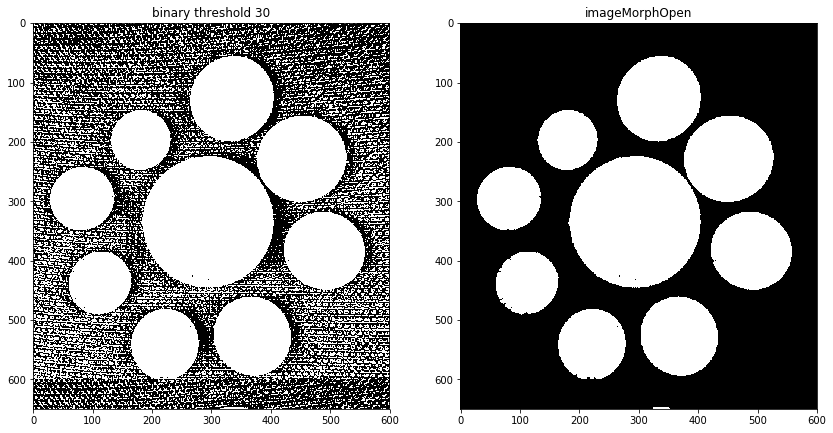

In [23]:
# Find connected components
###
### YOUR CODE HERE
###
_, imThresh = cv2.threshold(imageG, 30, 255, cv2.THRESH_BINARY)


element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7, 7))
imageMorphOpen = cv2.morphologyEx(imThresh, cv2.MORPH_OPEN, element)
plt.figure(figsize=(60, 60))
plt.subplot(181)
plt.imshow(imThresh);
plt.title("binary threshold 30")
plt.subplot(182)
plt.imshow(imageMorphOpen);
plt.title("imageMorphOpen")


number of connected components:  11


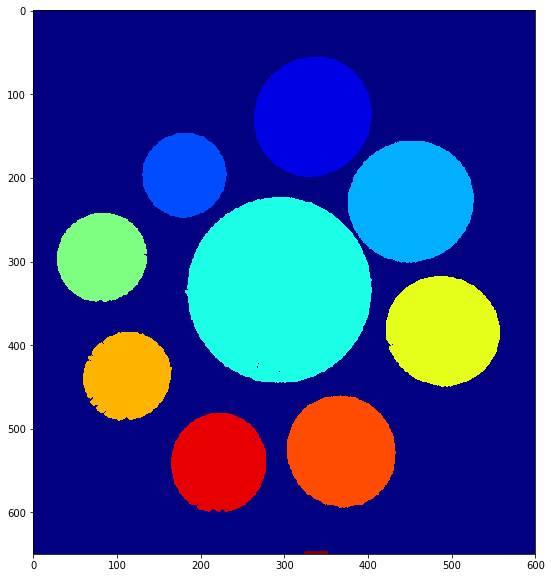

In [24]:
# Print number of connected components detected
###
### YOUR CODE HERE
###

nComponents, imLabels = cv2.connectedComponents(imageMorphOpen)
print("number of connected components: ", nComponents)


displayConnectedComponents(imLabels)




In [25]:
# Display connected components using displayConnectedComponents
# function
###
### YOUR CODE HERE
###


## <font style = "color:rgb(50,120,229)">Step 4.5: Detect coins using Contour Detection</font>

In the final step, perform Contour Detection on the binary image to find out the number of coins.

In [26]:
# Find all contours in the image
###
### YOUR CODE HERE
###
contours, hierarchy = cv2.findContours(imageMorphOpen, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [27]:
# Print the number of contours found
###
### YOUR CODE HERE
###
print("Number of contours found = {}".format(len(contours)))

Number of contours found = 10


Text(0.5,1,'external contours')

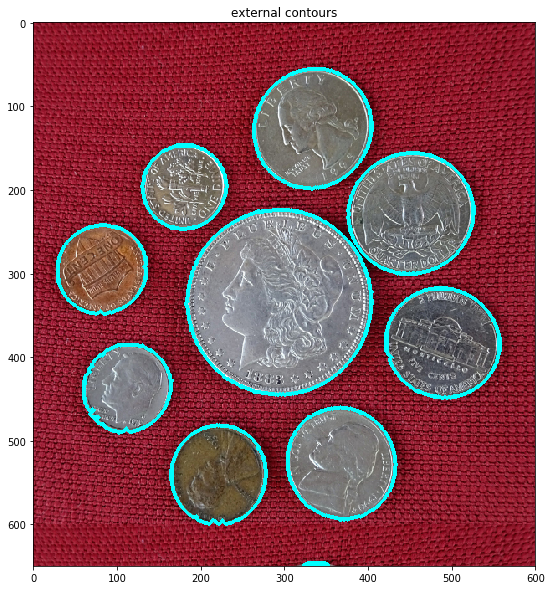

In [28]:
# Draw all contours
###
### YOUR CODE HERE
###
image = imageCopy.copy()
cv2.drawContours(image, contours, -1, (255,255,0), 3);
plt.figure()
plt.imshow(image[:,:,::-1])
plt.title("external contours")

Let's only consider the outer contours.

In [29]:
# Remove the inner contours
# Display the result
###
### YOUR CODE HERE
###


So, we only need the inner contours. The easiest way to do that will be to remove the outer contour using area.

In [30]:
# Print area and perimeter of all contours
###
### YOUR CODE HERE
###
smallest_area = 1000000
smallest_area_index = -1
for index,cnt in enumerate(contours):
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)
    print("Contour #{} has area = {} and perimeter = {}".format(index+1,area,perimeter))
    if(area < smallest_area):
        smallest_area = area
        smallest_area_index = index

Contour #1 has area = 78.0 and perimeter = 59.65685415267944
Contour #2 has area = 10484.0 and perimeter = 398.1320296525955
Contour #3 has area = 13445.5 and perimeter = 442.5168069601059
Contour #4 has area = 8475.5 and perimeter = 378.2325360774994
Contour #5 has area = 13838.5 and perimeter = 448.17366111278534
Contour #6 has area = 8841.5 and perimeter = 359.7472549676895
Contour #7 has area = 38048.5 and perimeter = 744.2224307060242
Contour #8 has area = 16923.5 and perimeter = 495.28635907173157
Contour #9 has area = 7815.5 and perimeter = 332.2914105653763
Contour #10 has area = 15664.0 and perimeter = 475.7300099134445


In [31]:
# Print the contour of smallest area
###
### YOUR CODE HERE
###
print("Contour #{} is the smallest area = {}".format(smallest_area_index+1, smallest_area))

Contour #1 is the smallest area = 78.0


In [32]:
# Remove this contour and plot others
###
### YOUR CODE HERE
###
contours.pop(smallest_area_index)
print("Number of contours after removing noise = {}".format(len(contours)))
for index,cnt in enumerate(contours):
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)
    print("Contour #{} has area = {} and perimeter = {}".format(index+1,area,perimeter))


Number of contours after removing noise = 9
Contour #1 has area = 10484.0 and perimeter = 398.1320296525955
Contour #2 has area = 13445.5 and perimeter = 442.5168069601059
Contour #3 has area = 8475.5 and perimeter = 378.2325360774994
Contour #4 has area = 13838.5 and perimeter = 448.17366111278534
Contour #5 has area = 8841.5 and perimeter = 359.7472549676895
Contour #6 has area = 38048.5 and perimeter = 744.2224307060242
Contour #7 has area = 16923.5 and perimeter = 495.28635907173157
Contour #8 has area = 7815.5 and perimeter = 332.2914105653763
Contour #9 has area = 15664.0 and perimeter = 475.7300099134445


Text(0.5,1,'external contours without noise')

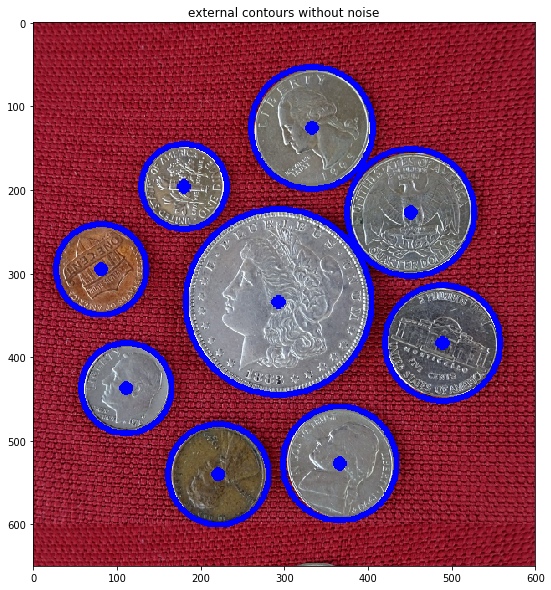

In [33]:
# Fit circles on coins
###
### YOUR CODE HERE
###
image = imageCopy.copy()
for cnt in contours:
    ((x,y),radius) = cv2.minEnclosingCircle(cnt)
    cv2.circle(image, (int(x),int(y)), int(round(radius)), (255,0,0), 5)
    cv2.circle(image, (int(x),int(y)), 4, (255,0,0), 8)
plt.figure()
plt.imshow(image[:,:,::-1])
plt.title("external contours without noise")

# <font style = "color:rgb(50,120,229)">Assignment Part - B</font>

**Follow the same steps as provided in Assignment Part - A**

## <font style = "color:rgb(50,120,229)"> Step 1: Read Image</font>

Text(0.5,1,'Original Image')

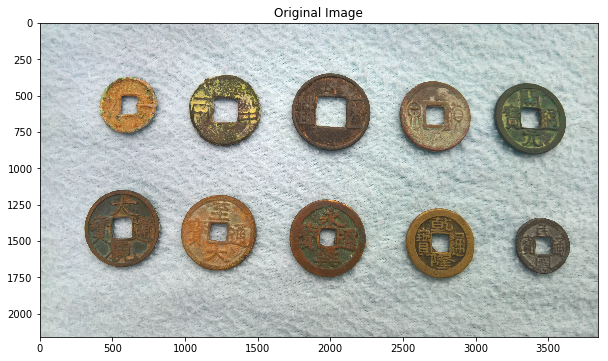

In [90]:
# Image path
imagePath = DATA_PATH + "images/CoinsB.png"
# Read image
# Store it in variable image
###
### YOUR CODE HERE
###
image = cv2.imread(imagePath, 1)
imageCopy = image.copy()
plt.imshow(image[:,:,::-1]);
plt.title("Original Image")

## <font style = "color:rgb(50,120,229)">Step 2.1: Convert Image to Grayscale</font>

In [91]:
# Convert to grayscale
# Store in variable imageGray
###
### YOUR CODE HERE
###
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

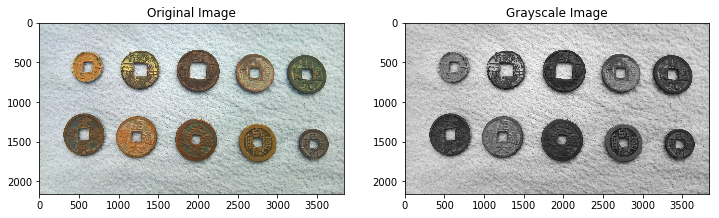

In [92]:
plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(image[:,:,::-1]);
plt.title("Original Image")
plt.subplot(122)
plt.imshow(imageGray);
plt.title("Grayscale Image");

## <font style = "color:rgb(50,120,229)">Step 2.2: Split Image into R,G,B Channels</font>

In [93]:
# Split cell into channels
# Variables are: imageB, imageG, imageR
###
### YOUR CODE HERE
###
imageB, imageG, imageR = cv2.split(image)

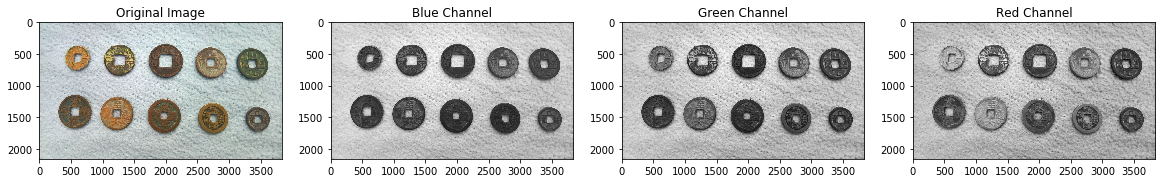

In [94]:
plt.figure(figsize=(20,12))
plt.subplot(141)
plt.imshow(image[:,:,::-1]);
plt.title("Original Image")
plt.subplot(142)
plt.imshow(imageB);
plt.title("Blue Channel")
plt.subplot(143)
plt.imshow(imageG);
plt.title("Green Channel")
plt.subplot(144)
plt.imshow(imageR);
plt.title("Red Channel");

## <font style = "color:rgb(50,120,229)">Step 3.1: Perform Thresholding</font>

You will have to carry out this step with different threshold values to see which one suits you the most. Do not remove those intermediate images and make sure to document your findings.

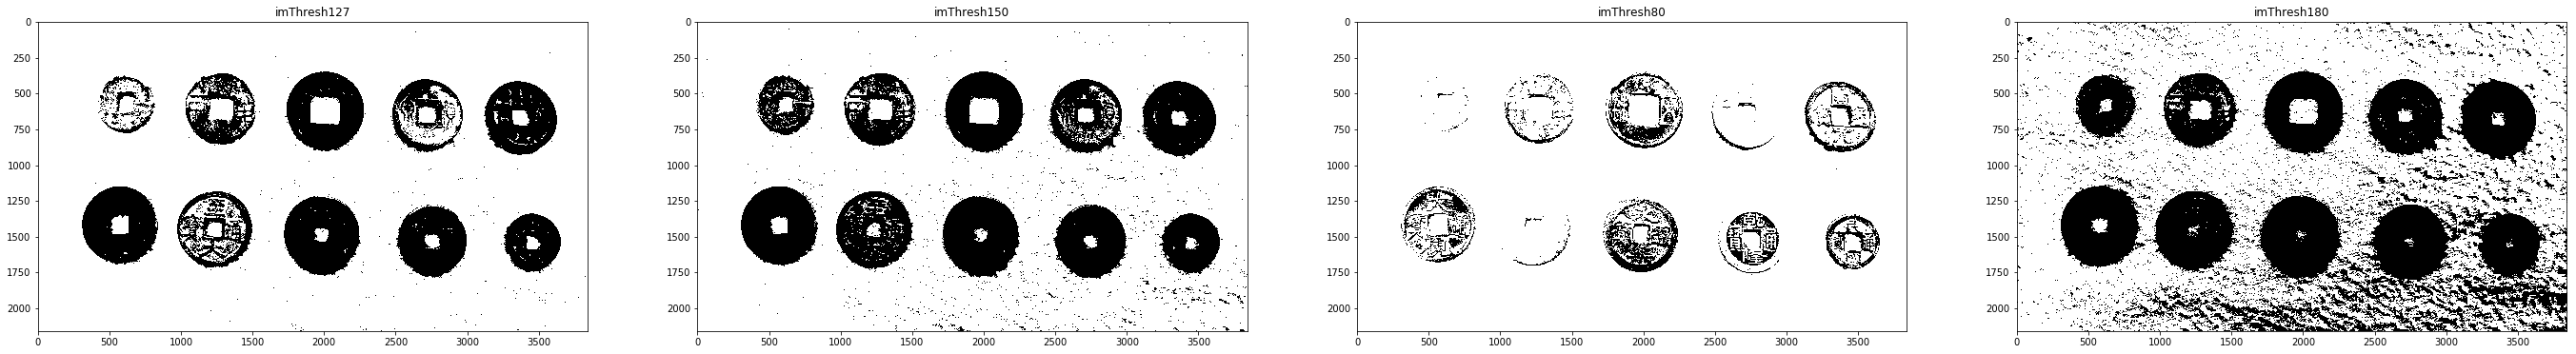

In [95]:
###
### YOUR CODE HERE
###
_, imThresh127 = cv2.threshold(imageGray, 127, 255, cv2.THRESH_BINARY)
_, imThresh150= cv2.threshold(imageGray, 150, 255, cv2.THRESH_BINARY)
_, imThresh80 = cv2.threshold(imageGray, 80, 255, cv2.THRESH_BINARY)
_, imThresh180 = cv2.threshold(imageGray, 180, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(60,60))
plt.subplot(151)
plt.imshow(imThresh127);
plt.title("imThresh127")
plt.subplot(152)
plt.imshow(imThresh150);
plt.title("imThresh150")
plt.subplot(153)
plt.imshow(imThresh80);
plt.title("imThresh80")
plt.subplot(154)
plt.imshow(imThresh180);
plt.title("imThresh180");

Text(0.5,1,'imThresh150')

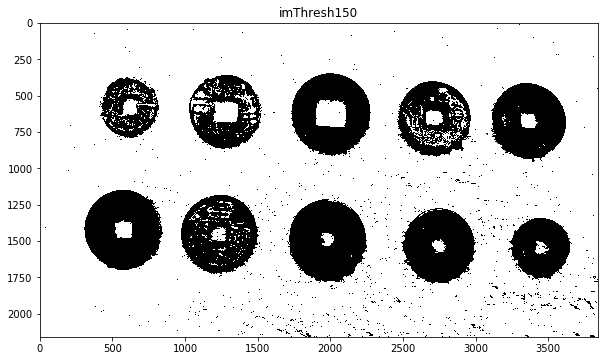

In [96]:
# Display image using matplotlib
###
### YOUR CODE HERE
###
plt.imshow(imThresh150);
plt.title("imThresh150")

## <font style = "color:rgb(50,120,229)">Step 3.2: Perform morphological operations</font>

You will have to carry out this step with different kernel size, kernel shape and morphological operations to see which one (or more) suits you the most. Do not remove those intermediate images and make sure to document your findings.

Text(0.5,1,'imageMorphClosed_size3_iter5')

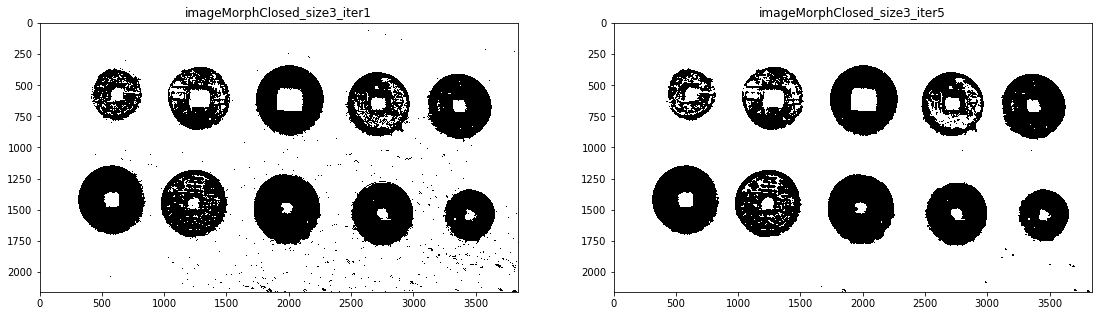

In [97]:
###
### YOUR CODE HERE
###
imThresh = imThresh150.copy()
ksize = 3;
element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (ksize, ksize))
imageMorphClosed_size3_iter1 = cv2.morphologyEx(imThresh, cv2.MORPH_CLOSE, element, iterations=1);

ksize = 3;
element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (ksize, ksize))
imageMorphClosed_size3_iter5 = cv2.morphologyEx(imThresh, cv2.MORPH_CLOSE, element, iterations=5);



plt.figure(figsize=(60,60))
plt.subplot(161)
plt.imshow(imageMorphClosed_size3_iter1);
plt.title("imageMorphClosed_size3_iter1")
plt.subplot(162)
plt.imshow(imageMorphClosed_size3_iter5);
plt.title("imageMorphClosed_size3_iter5")


Text(0.5,1,'imageMorphClosed_size11_iter5')

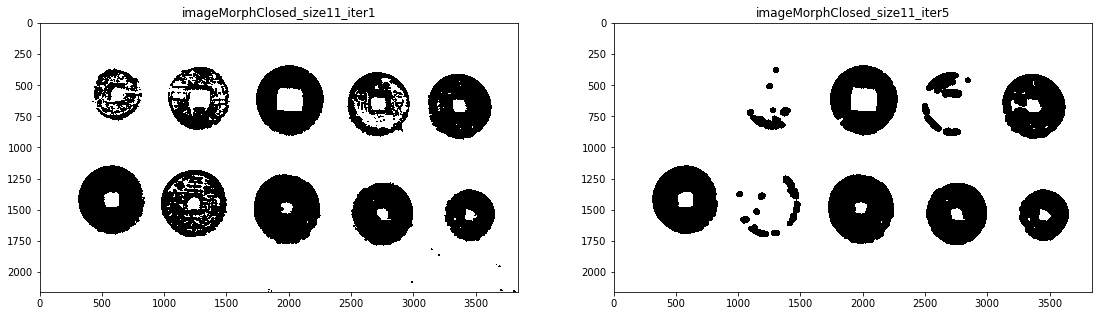

In [98]:
###
### YOUR CODE HERE
###
ksize = 11;
element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (ksize, ksize))
imageMorphClosed_size11_iter1 = cv2.morphologyEx(imThresh, cv2.MORPH_CLOSE, element, iterations=1);

ksize = 11;
element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (ksize, ksize))
imageMorphClosed_size11_iter5 = cv2.morphologyEx(imThresh, cv2.MORPH_CLOSE, element, iterations=5);
plt.figure(figsize=(60,60))
plt.subplot(163)
plt.imshow(imageMorphClosed_size11_iter1);
plt.title("imageMorphClosed_size11_iter1")
plt.subplot(164)
plt.imshow(imageMorphClosed_size11_iter5);
plt.title("imageMorphClosed_size11_iter5")

Text(0.5,1,'imageMorphClosed_size3_iter5')

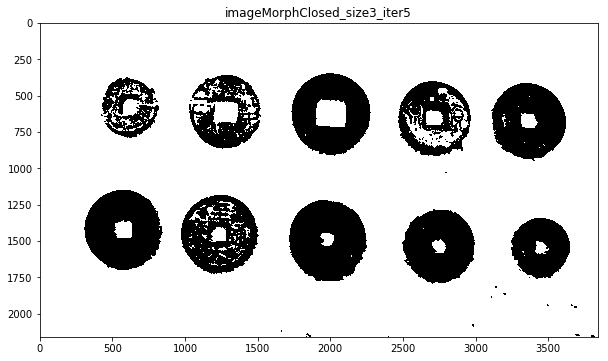

In [99]:
###
### YOUR CODE HERE
###
plt.imshow(imageMorphClosed_size3_iter5);
plt.title("imageMorphClosed_size3_iter5")

Text(0.5,1,'imageMorphOpen')

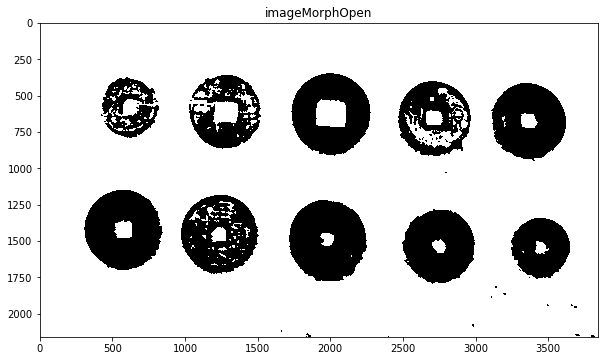

In [100]:
###
### YOUR CODE HERE
###
imThresh = imageMorphClosed_size3_iter5
ksize = 7;
element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (ksize, ksize))
imageMorphOpen = cv2.morphologyEx(imThresh, cv2.MORPH_OPEN, element, iterations=1);
plt.imshow(imageMorphOpen);
plt.title("imageMorphOpen")

Text(0.5,1,'imageMorphOpen')

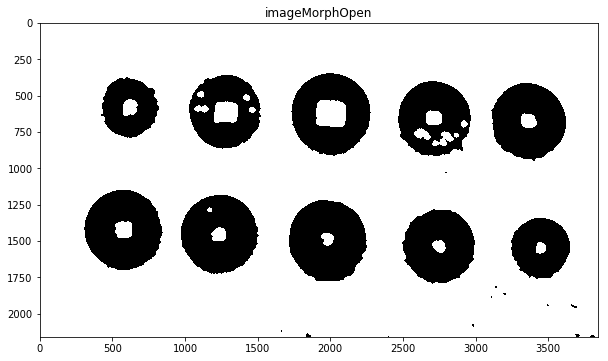

In [101]:
###
### YOUR CODE HERE
###
imThresh = imageMorphClosed_size3_iter5
ksize = 7;
element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (ksize, ksize))
imageMorphOpen = cv2.morphologyEx(imThresh, cv2.MORPH_OPEN, element, iterations=6);
plt.imshow(imageMorphOpen);
plt.title("imageMorphOpen")

Text(0.5,1,'imageMorphOpen')

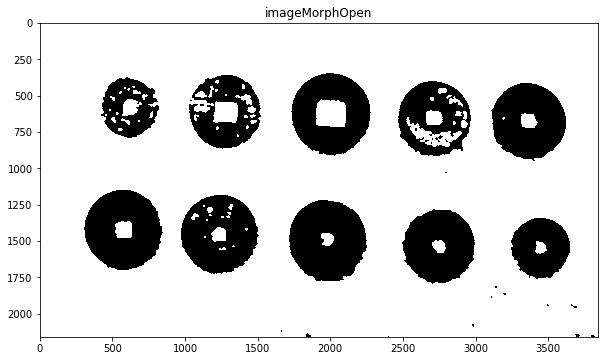

In [102]:
###
### YOUR CODE HERE
###
imThresh = imageMorphClosed_size3_iter5
ksize = 15;
element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (ksize, ksize))
imageMorphOpen = cv2.morphologyEx(imThresh, cv2.MORPH_OPEN, element, iterations=1);
plt.imshow(imageMorphOpen);
plt.title("imageMorphOpen")

Text(0.5,1,'imageMorphOpen')

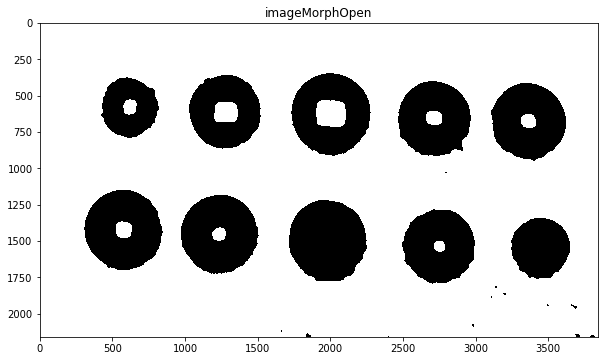

In [103]:
###
### YOUR CODE HERE
###
imThresh = imageMorphClosed_size3_iter5
ksize = 15;
element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (ksize, ksize))
imageMorphOpen = cv2.morphologyEx(imThresh, cv2.MORPH_OPEN, element, iterations=5);
plt.imshow(imageMorphOpen);
plt.title("imageMorphOpen")

Text(0.5,1,'imageMorphOpen')

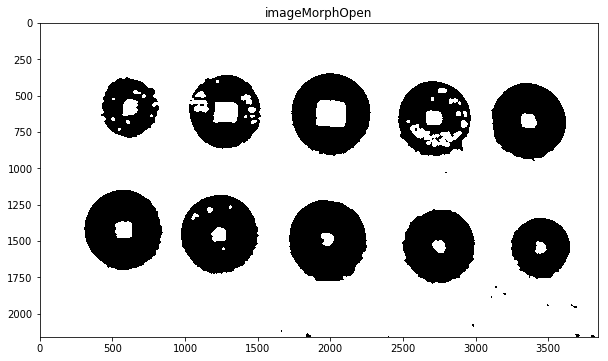

In [104]:

###
### YOUR CODE HERE
###
imThresh = imageMorphClosed_size3_iter5
ksize = 21;
element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (ksize, ksize))
imageMorphOpen = cv2.morphologyEx(imThresh, cv2.MORPH_OPEN, element, iterations=1);

plt.imshow(imageMorphOpen);
plt.title("imageMorphOpen")

Text(0.5,1,'imageMorphOpen')

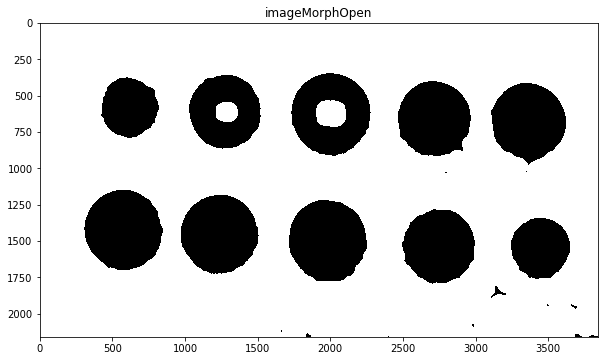

In [105]:
###
### YOUR CODE HERE
###
imThresh = imageMorphClosed_size3_iter5

ksize = 21;
element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (ksize, ksize))
imageMorphOpen = cv2.morphologyEx(imThresh, cv2.MORPH_OPEN, element, iterations=6);

plt.imshow(imageMorphOpen);
plt.title("imageMorphOpen")

In [106]:
###
### YOUR CODE HERE
###


In [107]:
###
### YOUR CODE HERE
###


In [108]:
###
### YOUR CODE HERE
###


In [109]:
###
### YOUR CODE HERE
###


In [110]:
###
### YOUR CODE HERE
###


In [111]:
###
### YOUR CODE HERE
###


In [112]:
###
### YOUR CODE HERE
###


In [113]:
###
### YOUR CODE HERE
###


## <font style = "color:rgb(50,120,229)">Step 4.1: Create SimpleBlobDetector</font>

In [114]:
# Set up the SimpleBlobdetector with default parameters.
params = cv2.SimpleBlobDetector_Params()

params.blobColor = 0

params.minDistBetweenBlobs = 2

# Filter by Area.
params.filterByArea = False

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.8

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.8

# Filter by Inertia
params.filterByInertia =True
params.minInertiaRatio = 0.8

In [115]:
# Create SimpleBlobDetector
detector = cv2.SimpleBlobDetector_create(params)


## <font style = "color:rgb(50,120,229)">Step 4.2: Detect Coins</font>

### <font style = "color:rgb(8,133,37)">Hints</font>
Use **`detector.detect(image)`** to detect the blobs (coins). The output of the function is a list of **keypoints** where each keypoint is unique for each blob.

Print the number of coins detected as well.

In [116]:
# Detect blobs
###
### YOUR CODE HERE
###
imageBinary = imageMorphOpen.copy()
keypoints = detector.detect(imageBinary)
print("Number of coins detected = {}".format(len(keypoints)))

Number of coins detected = 8


## <font style = "color:rgb(50,120,229)">Step 4.3: Display the detected coins on original image</font>

Make sure to mark the center of the blobs as well. **Use only the functions discussed in Image Annotation section in Week 1**

### <font style = "color:rgb(8,133,37)">Hints</font>
You can extract the coordinates of the center and the diameter of a blob using **`k.pt`** and **`k.size`** where `k` is a keypoint.

Text(0.5,1,'SimpleBlobDetector detect')

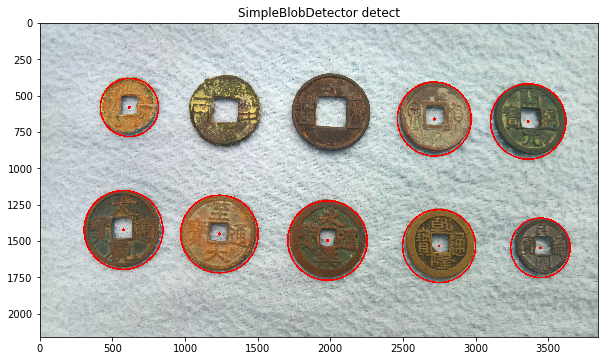

In [117]:
###
### YOUR CODE HERE
###
image = imageCopy.copy()
for point in keypoints:
    x, y = point.pt
    x=int(x)
    y=int(y)
    cv2.circle(image, (x,y), 5, (0, 0, 255), 10)
    radius = int(point.size // 2)
    cv2.circle(image, (x,y), radius, (0, 0, 255), 10)
    
plt.figure()
plt.imshow(image[:,:,::-1])
plt.title("SimpleBlobDetector detect")

In [118]:
###
### YOUR CODE HERE
###


In [119]:
###
### YOUR CODE HERE
###


**Note that we were able to detect 8 coins. So, that's your benchmark.**

## <font style = "color:rgb(50,120,229)">Step 4.4: Perform Connected Component Analysis</font>

Now, let's perform Connected Component Analysis (CCA) on the binary image to find out the number of connected components. Do you think we can use CCA to calculate number of coins? Why/why not?

Text(0.5,1,'imageBinary for CCA')

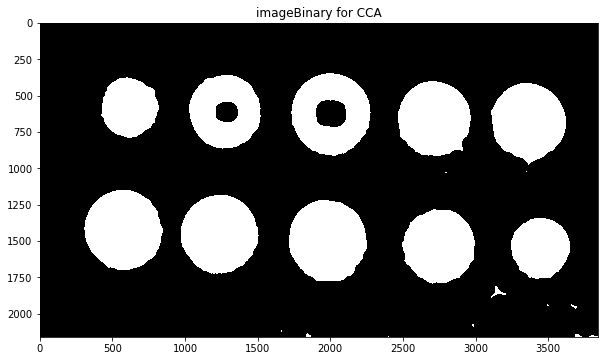

In [120]:
###
### YOUR CODE HERE
###
imageBinary = cv2.bitwise_not(imageBinary)
plt.figure()
plt.imshow(imageBinary)
plt.title("imageBinary for CCA")

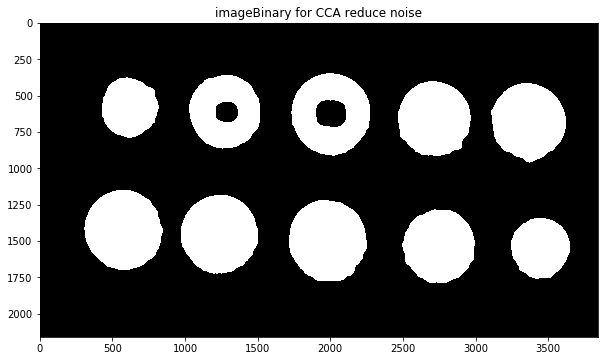

In [121]:
###
### YOUR CODE HERE
###
ksize = 21;
element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (ksize, ksize))
reduce_noise = cv2.morphologyEx(imageBinary, cv2.MORPH_OPEN, element, iterations=3)
plt.figure()
plt.imshow(reduce_noise)
plt.title("imageBinary for CCA reduce noise")

imageBinary = reduce_noise

number of connected components:  11


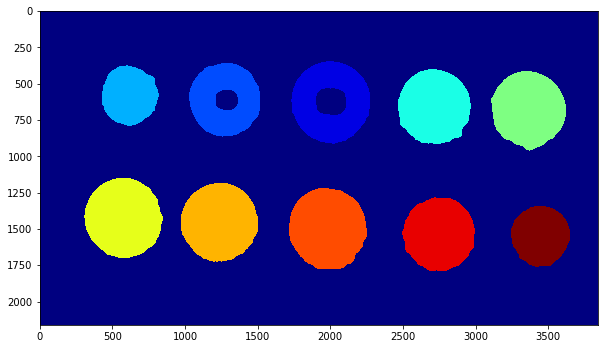

In [122]:
###
### YOUR CODE HERE
###
nComponents, imLabels = cv2.connectedComponents(imageBinary)
print("number of connected components: ", nComponents)


displayConnectedComponents(imLabels)


## <font style = "color:rgb(50,120,229)">Step 4.5: Detect coins using Contour Detection</font>

In the final step, perform Contour Detection on the binary image to find out the number of coins.

In [123]:
# Find all contours in the image
###
### YOUR CODE HERE
###
contours, hierarchy = cv2.findContours(imageBinary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [124]:
# Print the number of contours found
###
### YOUR CODE HERE
###
print("Number of contours found = {}".format(len(contours)))

Number of contours found = 10


Text(0.5,1,'external contours')

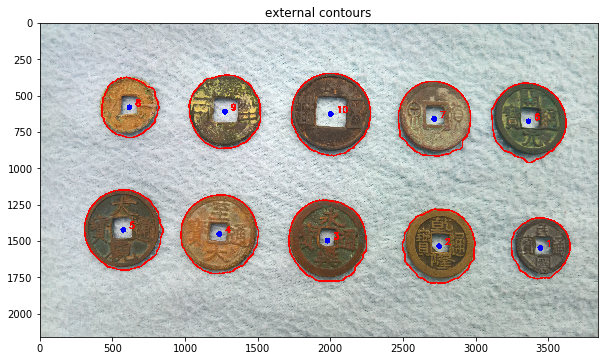

In [125]:
# Draw all contours
###
### YOUR CODE HERE
###
imageContours = imageCopy.copy()
cv2.drawContours(imageContours, contours, -1, (0, 0, 255), 10);

for i, contour in enumerate(contours): 
    M = cv2.moments(contour)
    x = int(M['m10']/M['m00'])
    y = int(M['m01']/M['m00'])
    cv2.circle(imageContours, (x, y),10, (255, 0, 0), 20)

    cv2.putText(imageContours, str(i + 1), (x + 40, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 10)

plt.figure()
plt.imshow(imageContours[:,:,::-1])
plt.title("external contours")

In [126]:
# Remove the inner contours
# Display the result
###
### YOUR CODE HERE
###


What do you think went wrong? As we can see, the outer box was detected as a contour and with respect to it, all other contours are internal and that's why they were not detected. How do we remove that? Let's see if we can use area of contours here.

In [127]:
# Print area and perimeter of all contours
###
### YOUR CODE HERE
###

for index,cnt in enumerate(contours):
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)
    print("Contour #{} has area = {} and perimeter = {}".format(index+1,area,perimeter))


Contour #1 has area = 130983.0 and perimeter = 1368.4204798936844
Contour #2 has area = 197216.0 and perimeter = 1685.6408232450485
Contour #3 has area = 234880.5 and perimeter = 1839.7657188177109
Contour #4 has area = 223975.0 and perimeter = 1786.5525139570236
Contour #5 has area = 229385.0 and perimeter = 1812.3514980077744
Contour #6 has area = 210916.5 and perimeter = 1738.7951496839523
Contour #7 has area = 203359.5 and perimeter = 1710.3443608283997
Contour #8 has area = 124246.5 and perimeter = 1344.5798643827438
Contour #9 has area = 195141.5 and perimeter = 1668.7707678079605
Contour #10 has area = 239048.5 and perimeter = 1839.76571393013


In [128]:
# Print maximum area of contour
# This will be the box that we want to remove
###
### YOUR CODE HERE
###


In [129]:
# Remove this contour and plot others
###
### YOUR CODE HERE
###


Now, we have to remove the internal contours. Again here we can use area or perimeter.

In [130]:
# Print sorted area of contours
###
### YOUR CODE HERE
###


We can clearly see the jump from 2nd area to 3rd. These are the 2 inner contours.

In [131]:
# Remove the 2 inner contours
# Plot the rest of them
###
### YOUR CODE HERE
###


Number of coins detected = 10


Text(0.5,1,'minEnclosingCircle')

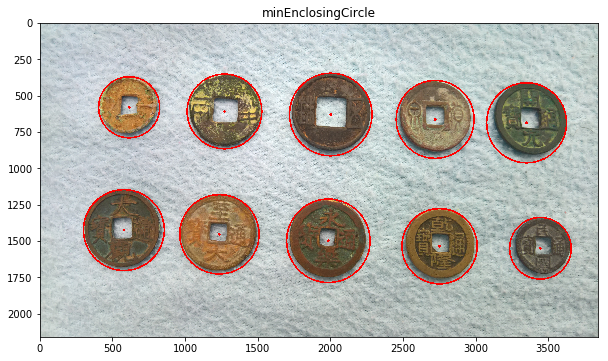

In [132]:
# Fit circles on coins
###
### YOUR CODE HERE
###
image = imageCopy.copy()
print("Number of coins detected = {}".format(len(contours)))
for cnt in contours:
    ((x,y),radius) = cv2.minEnclosingCircle(cnt)
    cv2.circle(image, (int(x),int(y)), int(round(radius)), (0,0,255), 10)
    cv2.circle(image, (int(x),int(y)), 4, (0,0,255), 10)
plt.figure()
plt.imshow(image[:,:,::-1])
plt.title("minEnclosingCircle")